In [49]:

key ="2201050767bb417f928e06c7166304c6b41e485d"
from census import Census
from us import states
%matplotlib inline
import seaborn as sns


import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
pd.options.mode.chained_assignment = None 
import os
import requests
import urllib.request, json 


c = Census(key)

In [50]:
areas = pd.read_csv("county.csv")

In [3]:
areas.drop("Unnamed: 0", axis= 1)

,Median Age,Median Age ME,Population,White,Black,Native American,Asian,Native Hawaiian,Other,Multiple,Foreign Born,Foreign Born ME,Child Poverty Ratio,Poor,Median Household Income,Name,County,State
0,58.2,4.0,76,55.0,0.0,3.0,0.0,0.0,0.0,6.0,9.0,10.0,3.0,12.0,56875.0,"Loving County, Texas",301,48
1,56.5,8.6,91,29.0,0.0,0.0,21.0,28.0,0.0,10.0,11.0,9.0,0.0,11.0,65625.0,"Kalawao County, Hawaii",5,15
2,39.8,10.5,274,210.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,36.0,50.0,9.0,57083.0,"King County, Texas",269,48
3,48.0,5.2,425,413.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,9.0,93.0,78.0,53750.0,"McPherson County, Nebraska",117,31
4,41.0,6.0,437,426.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0,3.0,137.0,35.0,40375.0,"Arthur County, Nebraska",5,31
5,50.4,6.4,445,445.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,75.0,69.0,38250.0,"Petroleum County, Montana",69,30
6,51.0,3.0,542,531.0,0.0,3.0,0.0,0.0,0.0,8.0,0.0,9.0,97.0,54.0,56750.0,"Loup County, Nebraska",115,31
7,49.0,6.1,552,419.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0,56.0,21.0,41250.0,"San Juan County, Colorado",111,8
8,31.7,19.1,558,160.0,0.0,0.0,1.0,0.0,0.0,0.0,140.0,129.0,154.0,127.0,24000.0,"Kenedy County, Texas",261,48
9,58.0,1.6,565,326.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,87.0,81.0,32404.0,"Harding County, New Mexico",21,35


In [4]:
areas.Population = areas.Population.astype(int)
areas["Median Household Income"] = areas["Median Household Income"].astype(int)

In [5]:
areas = areas[areas["Median Household Income"] > 0]
areas.drop("Unnamed: 0", axis= 1)
areas

,Unnamed: 0,Median Age,Median Age ME,Population,White,Black,Native American,Asian,Native Hawaiian,Other,Multiple,Foreign Born,Foreign Born ME,Child Poverty Ratio,Poor,Median Household Income,Name,County,State
0,2673,58.2,4.0,76,55.0,0.0,3.0,0.0,0.0,0.0,6.0,9.0,10.0,3.0,12.0,56875,"Loving County, Texas",301,48
1,548,56.5,8.6,91,29.0,0.0,0.0,21.0,28.0,0.0,10.0,11.0,9.0,0.0,11.0,65625,"Kalawao County, Hawaii",5,15
2,2657,39.8,10.5,274,210.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,36.0,50.0,9.0,57083,"King County, Texas",269,48
3,1712,48.0,5.2,425,413.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,9.0,93.0,78.0,53750,"McPherson County, Nebraska",117,31
4,1656,41.0,6.0,437,426.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0,3.0,137.0,35.0,40375,"Arthur County, Nebraska",5,31
5,1632,50.4,6.4,445,445.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,75.0,69.0,38250,"Petroleum County, Montana",69,30
6,1711,51.0,3.0,542,531.0,0.0,3.0,0.0,0.0,0.0,8.0,0.0,9.0,97.0,54.0,56750,"Loup County, Nebraska",115,31
7,300,49.0,6.1,552,419.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0,56.0,21.0,41250,"San Juan County, Colorado",111,8
8,2653,31.7,19.1,558,160.0,0.0,0.0,1.0,0.0,0.0,0.0,140.0,129.0,154.0,127.0,24000,"Kenedy County, Texas",261,48
9,1806,58.0,1.6,565,326.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,87.0,81.0,32404,"Harding County, New Mexico",21,35


In [43]:
z_10 =  areas[areas["Population"] <10001]
ten_50 = areas[(areas["Population"] >10000) & (areas["Population"] <50001)]
fifty_100 = areas[(areas["Population"] >50000) & (areas["Population"] <100001)]

h_5h = areas[(areas["Population"] >100000) & (areas["Population"] <500001)]
fiveh_m = areas[(areas["Population"] >500000) & (areas["Population"] <1000000)]
million = areas[areas["Population"] >1000000 ]

#small = areas[areas["Population"] <50001]
#small = small[small["Population"] > 10000]
#large =areas[areas["Population"] >50000]


Text(0.5,0,'Percentage Distribution of Black Residents in Counties')

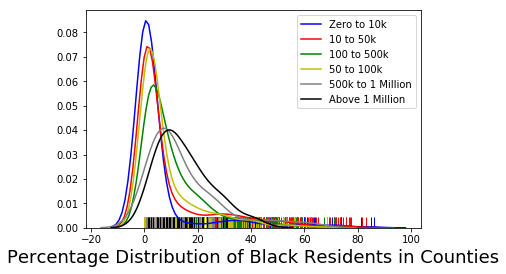

In [44]:
z_10["b_p"] = 100* z_10["Black"] /z_10["Population"]
ten_50["b_p"] = 100*ten_50["Black"] /ten_50["Population"]
h_5h["b_p"] = 100* h_5h["Black"] / h_5h["Population"]
fifty_100["b_p"] = 100* fifty_100["Black"] / fifty_100["Population"]
fiveh_m["b_p"] =  100*fiveh_m["Black"] /fiveh_m["Population"]
million["b_p"] = 100*million["Black"] /million["Population"]

fig, ax = plt.subplots()
sns.distplot(z_10["b_p"],hist=False, rug=True, ax=ax, color='b', label="Zero to 10k");
sns.distplot(ten_50["b_p"],hist=False, rug=True, ax=ax, color='r',label="10 to 50k");
sns.distplot(h_5h["b_p"],hist=False, rug=True, ax=ax, color='g', label="100 to 500k");
sns.distplot(fifty_100["b_p"],hist=False, rug=True, ax=ax, color='y', label="50 to 100k");
sns.distplot(fiveh_m["b_p"],hist=False, rug=True, ax=ax, color='grey', label="500k to 1 Million");
sns.distplot(million["b_p"],hist=False, rug=True, ax=ax, color='black', label="Above 1 Million");
plt.xlabel('Percentage Distribution of Black Residents in Counties', fontsize=18)

#large["fb_p"] =large["Foreign Born"] /large["Population"]
#small["fb_p"] =small["Foreign Born"] /small["Population"]


In [45]:
#large["fb_p"] *=100
#small["fb_p"] *= 100


KeyError: 'fb_p'

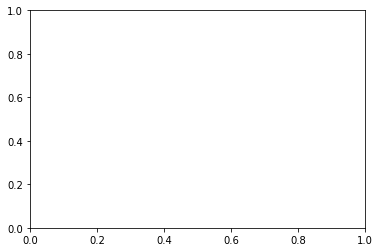

In [46]:
fig, ax = plt.subplots()
sns.distplot(z_10["fb_p"],hist=False, rug=True, ax=ax, color='b', label="Zero to 10k");
sns.distplot(ten_50["fb_p"],hist=False, rug=True, ax=ax, color='r',label="10 to 50k");
sns.distplot(fifty_100["fb_p"],hist=False, rug=True, ax=ax, color='y', label="50 to 100k");
sns.distplot(h_5h["fb_p"],hist=False, rug=True, ax=ax, color='g', label="100 to 500k");
sns.distplot(fiveh_m["fb_p"],hist=False, rug=True, ax=ax, color='grey', label="500k to 1 Million");
sns.distplot(million["fb_p"],hist=False, rug=True, ax=ax, color='black', label="Above 1 Million");
plt.xlabel('Percentage of Foreign Born Residents in Counties', fontsize=18)


Text(0.5,0,'Percentage of Foreign Born Residents in Counties')

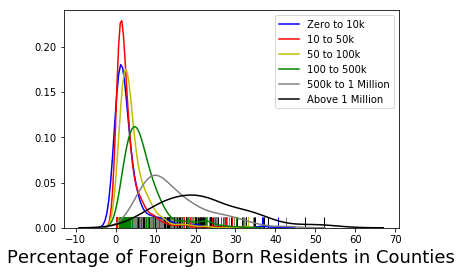

In [48]:
z_10["fb_p"] = 100* z_10["Foreign Born"] /z_10["Population"]
ten_50["fb_p"] = 100*ten_50["Foreign Born"] /ten_50["Population"]
fifty_100["fb_p"] = 100* fifty_100["Foreign Born"] / fifty_100["Population"]
h_5h["fb_p"] = 100* h_5h["Foreign Born"] / h_5h["Population"]
fiveh_m["fb_p"] =  100*fiveh_m["Foreign Born"] /fiveh_m["Population"]
million["fb_p"] = 100*million["Foreign Born"] /million["Population"]
fig, ax = plt.subplots()
sns.distplot(z_10["fb_p"],hist=False, rug=True, ax=ax, color='b', label="Zero to 10k");
sns.distplot(ten_50["fb_p"],hist=False, rug=True, ax=ax, color='r',label="10 to 50k");
sns.distplot(fifty_100["fb_p"],hist=False, rug=True, ax=ax, color='y', label="50 to 100k");
sns.distplot(h_5h["fb_p"],hist=False, rug=True, ax=ax, color='g', label="100 to 500k");
sns.distplot(fiveh_m["fb_p"],hist=False, rug=True, ax=ax, color='grey', label="500k to 1 Million");
sns.distplot(million["fb_p"],hist=False, rug=True, ax=ax, color='black', label="Above 1 Million");
plt.xlabel('Percentage of Foreign Born Residents in Counties', fontsize=18)


In [ ]:
sns.distplot(small["Median Household Income"], bins=20, kde=False, rug=True)

In [ ]:
x =sns.distplot(small["Median Household Income"], hist=False, rug=True);


In [ ]:
large = areas[areas["Population"] >= 20000]
large

In [ ]:
sns.distplot(large["Median Household Income"], bins=20, kde=False, rug=True)

In [ ]:
y = sns.distplot(large["Median Household Income"],hist=False, rug=True);


In [ ]:
large_income = large["Median Household Income"]
small_income = small["Median Household Income"]
fig, ax = plt.subplots()
sns.distplot(large["Median Household Income"],hist=False, rug=True, ax=ax, color='b');
sns.distplot(small["Median Household Income"],hist=False, rug=True, ax=ax, color='r');

In [ ]:
georgia = areas[areas["State"] == 13]

In [ ]:
new_york = areas[areas["State"] == 36]

In [ ]:
fig, ax = plt.subplots()

sns.distplot(georgia["Median Household Income"],bins=20, kde=False, rug=True, ax=ax, color='b');
sns.distplot(new_york["Median Household Income"],bins=20, kde=False, rug=True, ax=ax, color='r');